In [1]:
!python --version

Python 3.13.7


In [2]:
from PIL import Image
import gc

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn.functional import max_pool2d, avg_pool2d

In [3]:
[gc.collect(gen) for gen in range(3)]

[83, 7, 27]

In [4]:
# damn 4 channels huh???
image = torch.FloatTensor(np.array(np.unstack(np.array(Image.open(r"C:/Users/Anoban/Downloads/Root_Images/Adzuki_bean/79.tiff")), axis=-1)))[:3]
# got rid of the alpha??? channel
image.shape

torch.Size([3, 6156, 4414])

In [5]:
image.mean(dim=-3).repeat(3, 1, 1).shape

torch.Size([3, 6156, 4414])

In [18]:
pooled = avg_pool2d(image.mean(dim=-3).repeat(3, 1, 1), kernel_size=(52, 52), stride=52)[0].type(torch.int32).numpy()
pooled.shape

(118, 84)

In [19]:
pooled.min(), pooled.max()

(np.int32(12), np.int32(255))

In [21]:
# pooled[pooled < 220] = 1
pooled[pooled > 220] = 1000
pooled[pooled <= 220] = 1
pooled[pooled >= 220] = 0

In [22]:
y_pos = np.linspace(start=0, stop=image.shape[1], num=pooled.shape[0], endpoint=False, dtype=np.int32)
x_pos = np.linspace(start=0, stop=image.shape[2], num=pooled.shape[1], endpoint=False, dtype=np.int32)

In [23]:
pooled.min(), pooled.max()

(np.int32(0), np.int32(1))

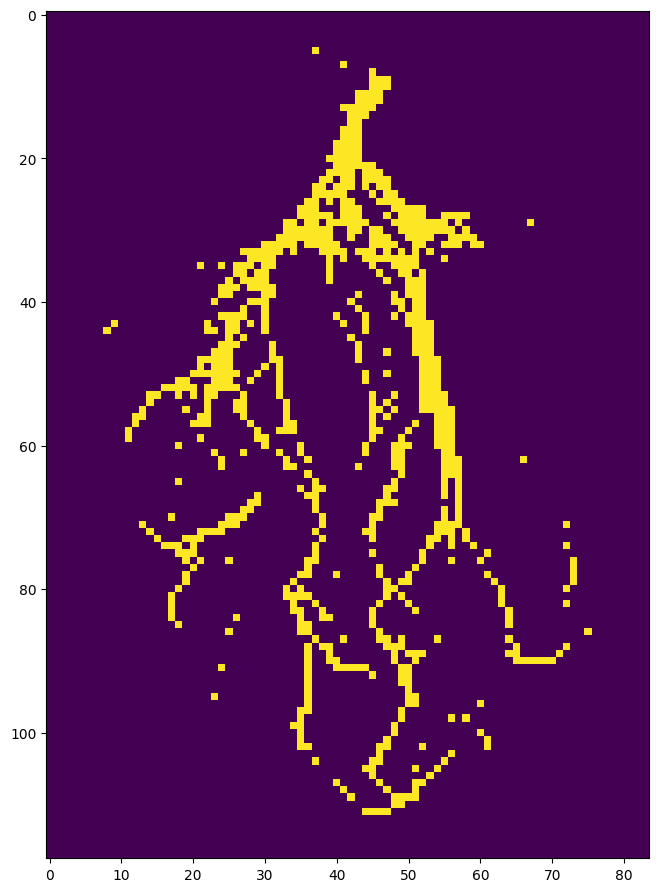

In [24]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 11)
axes.imshow(pooled)
plt.show()

In [12]:
# you gotta do pooling man!!!!!`

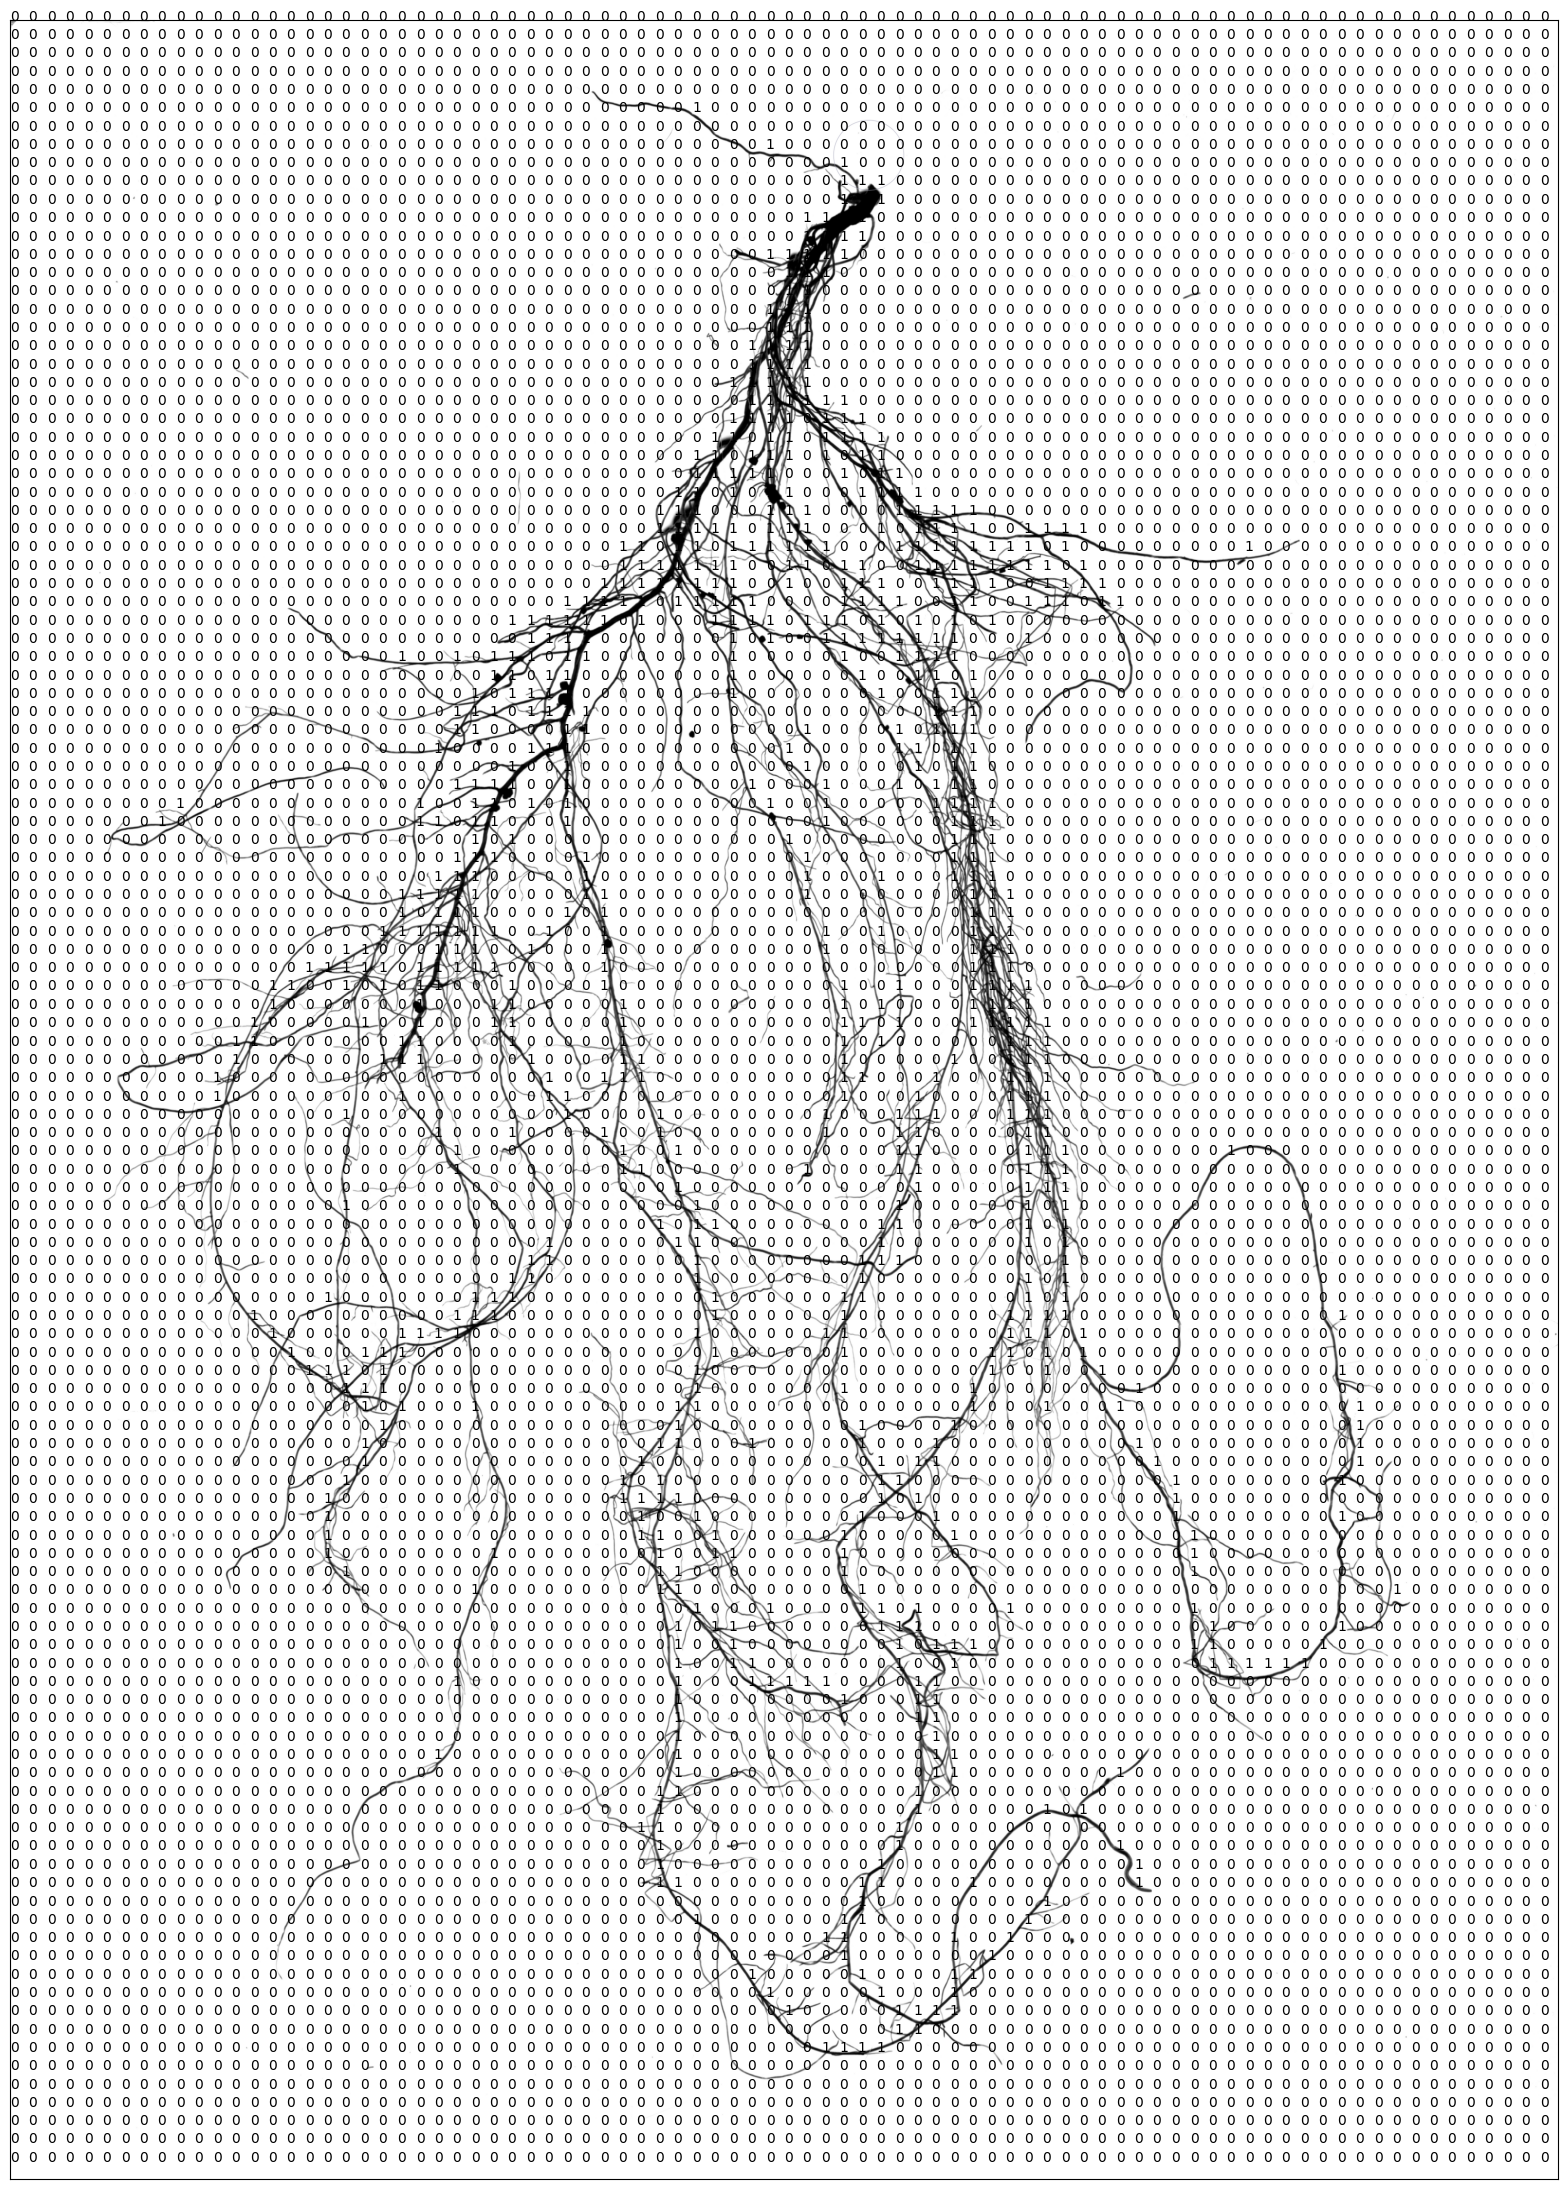

In [30]:
fig, axes = plt.subplots()
fig.set_size_inches(30, 22)

axes.imshow(np.stack(image.type(torch.uint8), axis=2))
for lx, x in enumerate(x_pos):
    for ly, y in enumerate(y_pos):
        axes.text(x=x, y=y, s=f"{pooled[ly, lx]:1d}")

axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()
# plt.show()
plt.savefig(fname=r"./biroot.png", format=r"png", dpi=500)

In [88]:
# plt.close()

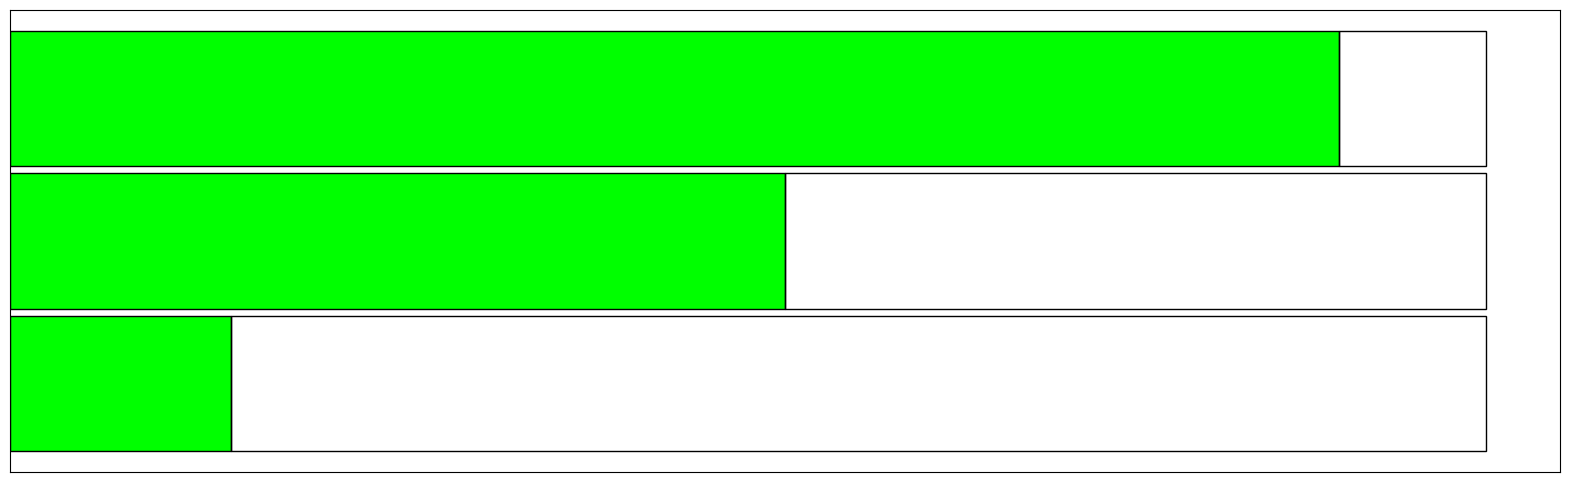

In [23]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 6)
fill = np.linspace(start=15, stop=90, num=3)
axes.barh(y=[0, 1, 2], width=fill, height=0.95, edgecolor="black", color="lime")
axes.barh(y=[0, 1, 2], width=100-fill, left=fill, height=0.95, edgecolor="black", color="none")
axes.set_xticks([])
axes.set_yticks([])
plt.show()